# CS498DL Assignment 2

In [1]:
from sklearn.utils import shuffle

import matplotlib.pyplot as plt
import numpy as np

from kaggle_submission import output_submission_csv
from utils.data_process import get_CIFAR10_data

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)  # set default size of plots

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
def get_acc(pred, y_test):
    return np.sum(y_test==pred)/len(y_test)*100

## Loading CIFAR-10
Now that you have implemented a neural network that passes gradient checks and works on toy data, you will test your network on the CIFAR-10 dataset.

In [3]:
# You can change these numbers for experimentation
# For submission be sure they are set to the default values
TRAIN_IMAGES = 49000
VAL_IMAGES = 1000
TEST_IMAGES = 10000

data = get_CIFAR10_data(TRAIN_IMAGES, VAL_IMAGES, TEST_IMAGES)
X_train, y_train = data['X_train'], data['y_train']
X_val, y_val = data['X_val'], data['y_val']
X_test, y_test = data['X_test'], data['y_test']

## Train using SGD (2-layers)

In [10]:
from models.neural_net_sgd import NeuralNetwork

# Hyperparameters for SGD 2-layers

input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 50
batch_size = 2000
learning_rate = 1e-1
learning_rate_decay = 0.98
regularization =  0.2

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)
net.learning_rate_decay = learning_rate_decay
net.num_epochs = epochs
# Variables to store performance for each epoch
train_loss_sgd_2 = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy_sgd_2 = np.zeros(epochs)
y_pred_train = np.zeros_like(y_train)

# For each epoch...
print('epochs:', end= ' ')
for epoch in range(epochs):
    print(epoch, end= ' ')
    XX_train, yy_train = shuffle(X_train, y_train)
    net.loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = XX_train[i:i + batch_size]
        y_batch = yy_train[i:i + batch_size]
        y_pred = net.forward(X_batch, y_batch, regularization)
        loss = net.backward(X_batch, y_batch, learning_rate, epoch, regularization) 
        train_loss_sgd_2[epoch] += loss
        y_pred_train[i:i + batch_size] = y_pred
    
    train_accuracy[epoch] = get_acc(y_pred_train, yy_train)
    
#    print(train_loss_sgd_2)
    y_pred_val = net.forward(X_val,y_val)
    val_accuracy_sgd_2[epoch] = get_acc(y_pred_val, y_val)  
    
    
y_pred_val = net.forward(X_val,y_val)
print('\nValidation accuracy:', get_acc(y_pred_val, y_val))

y_pred = net.forward(X_test,y_test)
print('Test accuracy:', get_acc(y_pred, y_test))

epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
Validation accuracy: 49.2
Test accuracy: 48.85


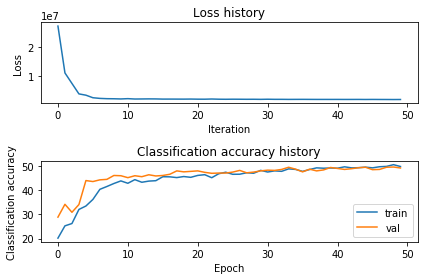

In [22]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd_2)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy_sgd_2, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Kaggle output

In [14]:
best_2layer_sgd_prediction = y_pred
output_submission_csv('./kaggle/nn_2layer_sgd_submission.csv', best_2layer_sgd_prediction)

## =========================================================================

## Train using SGD (3-layers)

In [26]:
from models.neural_net_sgd import NeuralNetwork

# Hyperparameters for SGD 3-layers

input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 50
batch_size = 3000
learning_rate = 1e-1
learning_rate_decay = 0.98
regularization =  0.2

# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)
net.learning_rate_decay = learning_rate_decay
net.num_epochs = epochs
# Variables to store performance for each epoch
train_loss_sgd_3 = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy_sgd_3 = np.zeros(epochs)
y_pred_train = np.zeros_like(y_train)

# For each epoch...
print('epochs:', end= ' ')
for epoch in range(epochs):
    print(epoch, end= ' ')
    XX_train, yy_train = shuffle(X_train, y_train)
    net.loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = XX_train[i:i + batch_size]
        y_batch = yy_train[i:i + batch_size]
        y_pred = net.forward(X_batch, y_batch, regularization)
        loss = net.backward(X_batch, y_batch, learning_rate, epoch, regularization) 
        train_loss_sgd_3[epoch] += loss
        y_pred_train[i:i + batch_size] = y_pred
    
    train_accuracy[epoch] = get_acc(y_pred_train, yy_train)
    
#    print(train_loss_sgd_3)
    y_pred_val = net.forward(X_val,y_val)
    val_accuracy_sgd_3[epoch] = get_acc(y_pred_val, y_val)  
    
    
y_pred_val = net.forward(X_val,y_val)
print('\nValidation accuracy:', get_acc(y_pred_val, y_val))

y_pred = net.forward(X_test,y_test)
print('Test accuracy:', get_acc(y_pred, y_test))

epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 
Validation accuracy: 47.0
Test accuracy: 46.37


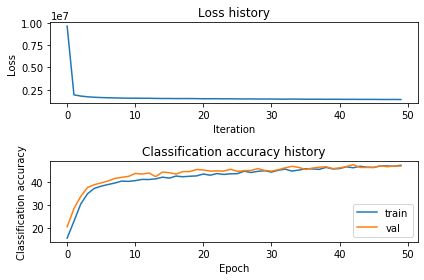

In [29]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd_3)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy_sgd_3, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()


plt.tight_layout()
plt.show()

## Kaggle output

In [28]:
best_3layer_sgd_prediction = y_pred
output_submission_csv('./kaggle/nn_3layer_sgd_submission.csv', best_3layer_sgd_prediction)

## =========================================================================

## Train using ADAM (2-layers)

In [60]:
from models.neural_net_adam import NeuralNetwork

# Hyperparameters for adam 2-layers

input_size = 32 * 32 * 3
num_layers = 2
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 100
batch_size = 3000
learning_rate = 1e-3
learning_rate_decay = 0.98
regularization =  0.01


# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)
net.learning_rate_decay = learning_rate_decay
net.num_epochs = epochs
# Variables to store performance for each epoch
train_loss_adam_2 = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy_adam_2 = np.zeros(epochs)
y_pred_train = np.zeros_like(y_train)

# For each epoch...
print('epochs:', end= ' ')
for epoch in range(epochs):
    print(epoch, end= ' ')
    XX_train, yy_train = shuffle(X_train, y_train)
    net.loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = XX_train[i:i + batch_size]
        y_batch = yy_train[i:i + batch_size]
        net.t += 1;
        y_pred = net.forward(X_batch, y_batch, regularization)
        loss = net.backward(X_batch, y_batch, learning_rate, epoch, regularization) 
        train_loss_adam_2[epoch] += loss
        y_pred_train[i:i + batch_size] = y_pred
    
    train_accuracy[epoch] = get_acc(y_pred_train, yy_train)
    
    y_pred_val = net.forward(X_val,y_val)
    val_accuracy_adam_2[epoch] = get_acc(y_pred_val, y_val)  

y_pred_val = net.forward(X_val,y_val)
print('\nValidation accuracy:', get_acc(y_pred_val, y_val))

y_pred = net.forward(X_test,y_test)
print('Test accuracy:', get_acc(y_pred, y_test))

epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
Validation accuracy: 48.6
Test accuracy: 47.910000000000004


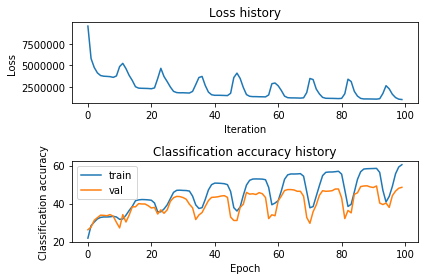

In [61]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_adam_2)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy_adam_2, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Kaggle output

In [62]:
best_2layer_adam_prediction = y_pred
output_submission_csv('./kaggle/nn_2layer_adam_submission.csv', best_2layer_adam_prediction)

## =========================================================================

## Train using ADAM (3-layers)

In [49]:
from models.neural_net_adam import NeuralNetwork

# Hyperparameters for adam 3-layers

input_size = 32 * 32 * 3
num_layers = 3
hidden_size = 120
hidden_sizes = [hidden_size] * (num_layers - 1)
num_classes = 10
epochs = 150
batch_size = 3000
learning_rate = 1e-3
learning_rate_decay = 0.98
regularization =  0.01


# Initialize a new neural network model
net = NeuralNetwork(input_size, hidden_sizes, num_classes, num_layers)
net.learning_rate_decay = learning_rate_decay
net.num_epochs = epochs
# Variables to store performance for each epoch
train_loss_adam_3 = np.zeros(epochs)
train_accuracy = np.zeros(epochs)
val_accuracy_adam_3 = np.zeros(epochs)
y_pred_train = np.zeros_like(y_train)

# For each epoch...
print('epochs:', end= ' ')
for epoch in range(epochs):
    print(epoch, end= ' ')
    XX_train, yy_train = shuffle(X_train, y_train)
    net.loss = 0
    for i in range(0, X_train.shape[0], batch_size):
        X_batch = XX_train[i:i + batch_size]
        y_batch = yy_train[i:i + batch_size]
        net.t += 1;
        y_pred = net.forward(X_batch, y_batch, regularization)
        loss = net.backward(X_batch, y_batch, learning_rate, epoch, regularization) 
        train_loss_adam_3[epoch] += loss
        y_pred_train[i:i + batch_size] = y_pred
    
    train_accuracy[epoch] = get_acc(y_pred_train, yy_train)
    
    y_pred_val = net.forward(X_val,y_val)
    val_accuracy_adam_3[epoch] = get_acc(y_pred_val, y_val)  

y_pred_val = net.forward(X_val,y_val)
print('\nValidation accuracy:', get_acc(y_pred_val, y_val))

y_pred = net.forward(X_test,y_test)
print('Test accuracy:', get_acc(y_pred, y_test))

epochs: 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 
Validation accuracy: 53.7
Test accuracy: 54.82


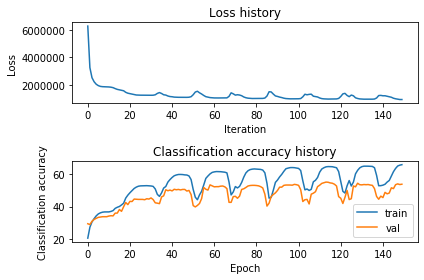

In [52]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(train_loss_adam_3)
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(train_accuracy, label='train')
plt.plot(val_accuracy_adam_3, label='val')
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

## Kaggle output

In [51]:
best_3layer_adam_prediction = y_pred
output_submission_csv('./kaggle/nn_3layer_adam_submission.csv', best_3layer_adam_prediction)

## Compare SGD and Adam
Create graphs to compare training loss and validation accuracy between SGD and Adam. The code is similar to the above code, but instead of comparing train and validation, we are comparing SGD and Adam.

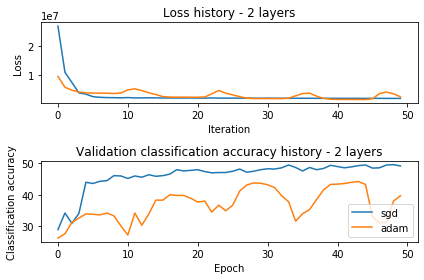

In [63]:
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd_2, label = 'sgd')
plt.plot(train_loss_adam_2[0:50], label = 'adam')
plt.title('Loss history - 2 layers')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(val_accuracy_sgd_2, label='sgd')
plt.plot(val_accuracy_adam_2[0:50], label= 'adam')
plt.title('Validation classification accuracy history - 2 layers')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()

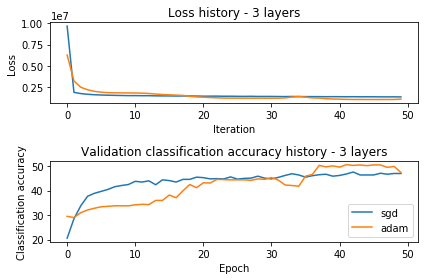

In [58]:
plt.subplot(2, 1, 1)
plt.plot(train_loss_sgd_3, label = 'sgd')
plt.plot(train_loss_adam_3[0:50], label = 'adam')
plt.title('Loss history - 3 layers')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(2, 1, 2)
plt.plot(val_accuracy_sgd_3, label='sgd')
plt.plot(val_accuracy_adam_3[0:50], label= 'adam')
plt.title('Validation classification accuracy history - 3 layers')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend()

plt.tight_layout()
plt.show()